In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from random import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 0 Load the data

In [19]:
dir = "./ddf--datapoints--population--by--country--age--gender--year"
# get all the files name in the directory
files = os.listdir(dir)
# read all the files and concatenate them into one dataframe
df = pd.concat([pd.read_csv(f"{dir}/{f}") for f in files])
# print(df[df["country"] == "chn"].head())

# 1 Matplotlib
1. Create a line plot comparing total population over time:
- Choose 5 countries
- Calculate the total population by country for each year

In [20]:
# To get the population of a country for a given year
countries = df["country"].unique()
# sample 5 countries from countries
seed(123)
selected_countries = sample(list(countries), 5)
print(selected_countries)
population_by_country = {}
for country in selected_countries:
    population_by_country[country] = df[df["country"] == country].groupby("year")["population"].sum()
print(population_by_country[selected_countries[0]].head())

['civ', 'esh', 'gbr', 'ago', 'ecu']
year
1950    2735197
1951    2809374
1952    2885725
1953    2965154
1954    3048557
Name: population, dtype: int64


- Create a line plot showing population trends
- Include a legend identifying each country
- Add appropriate axis labels and title
- Use different line styles or colors to distinguish the countries

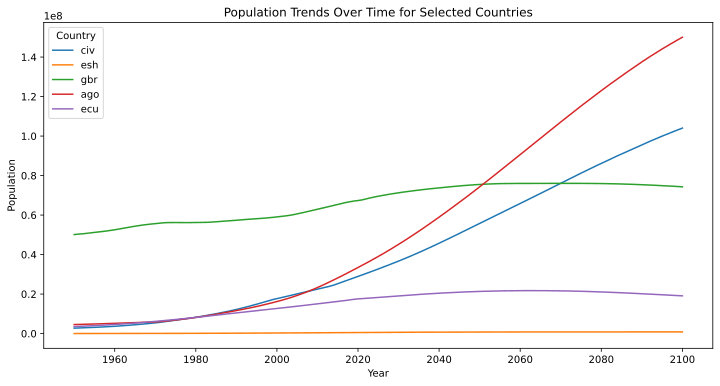

In [21]:
plt.figure(figsize=(12, 6))

# Plot population trends for each selected country
for country in selected_countries:
    plt.plot(population_by_country[country].index, population_by_country[country].values, label=country)

# Add legend
plt.legend(title='Country')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends Over Time for Selected Countries')

# Show plot
plt.show()

2. Investigate demographic shifts using a stacked bar chart:

- Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
- Create a stacked bar chart showing these changes

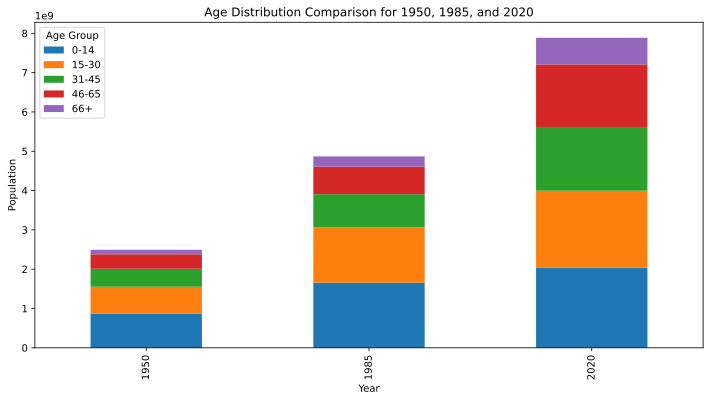

In [22]:

# Define age groups
age_groups = [(0, 14), (15, 30), (31, 45), (46, 65), (66, 100)]
age_group_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Define the years of interest
years_of_interest = [1950, 1985, 2020]

# Initialize a dictionary to store the population data for each year and age group
population_by_age_group = {year: {label: 0 for label in age_group_labels} for year in years_of_interest}

# Calculate the population for each age group and year
for year in years_of_interest:
    for (start_age, end_age), label in zip(age_groups, age_group_labels):
        population_by_age_group[year][label] = df[(df['year'] == year) & (df['age'] >= start_age) & (df['age'] <= end_age)]['population'].sum()

# Create a dataframe from the dictionary
population_df = pd.DataFrame(population_by_age_group)

# Plot the stacked bar chart
population_df.T.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Age Distribution Comparison for 1950, 1985, and 2020')
plt.legend(title='Age Group')

# Show plot
plt.show()

# Part 2: Seaborn

Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.

- Use seaborn's heatmap function
- Add clear annotations and labels
- Write a brief explanation of what the heatmap reveals about the population structure

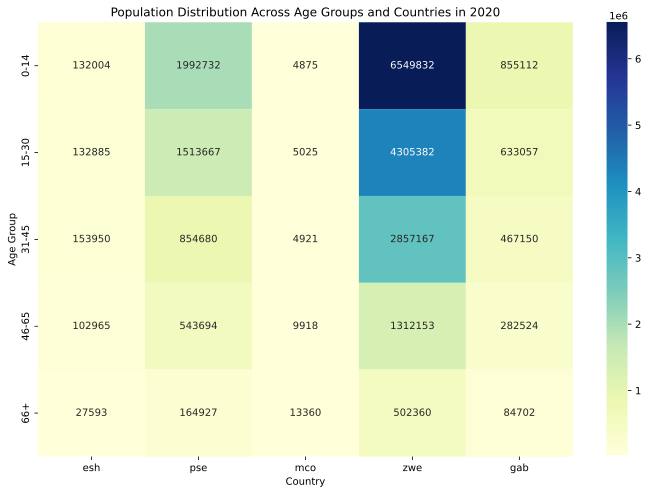

In [25]:
# Select 5 countries of your choice
selected_countries_for_heatmap = sample(list(countries), 5)

# Define the specific year of interest
year_of_interest = 2020

# Initialize a dictionary to store the population data for each country and age group
heatmap_data = {country: {label: 0 for label in age_group_labels} for country in selected_countries_for_heatmap}

# Calculate the population for each age group and country
for country in selected_countries_for_heatmap:
    for (start_age, end_age), label in zip(age_groups, age_group_labels):
        heatmap_data[country][label] = df[(df['year'] == year_of_interest) & (df['country'] == country) & (df['age'] >= start_age) & (df['age'] <= end_age)]['population'].sum()

# Create a dataframe from the dictionary
heatmap_df = pd.DataFrame(heatmap_data)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlGnBu")

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Age Group')
plt.title(f'Population Distribution Across Age Groups and Countries in {year_of_interest}')

# Show plot
plt.show()

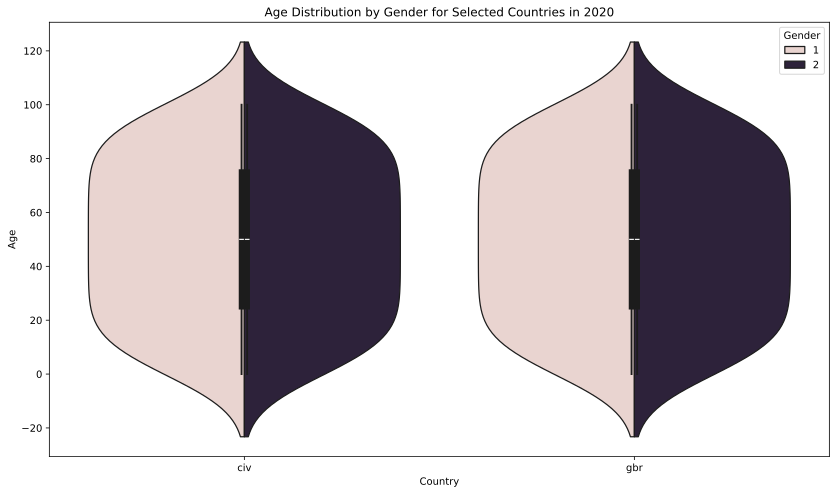

In [ ]:
countries_to_compare = ['civ', 'gbr'] 
df_2020 = df[(df['year'] == 2020) & (df['country'].isin(countries_to_compare))]

# Create the violin plots
plt.figure(figsize=(14, 8))
sns.violinplot(x='country', y='age', hue='gender', data=df_2020, split=True)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Age Distribution by Gender for Selected Countries in 2020')
plt.legend(title='Gender', loc='upper right')

# Show plot
plt.show()

In [ ]:
# Select four countries of your choice
selected_countries_for_pairplot = sample(list(countries), 4)

# Filter the dataframe for the selected countries
df_pairplot = df[df['country'].isin(selected_countries_for_pairplot)]

# Create the pairplot
sns.pairplot(df_pairplot, hue='country')

# Show plot
plt.show()